In [1]:
import pickle

import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "")))
from src.models.evaluate import load_models, evaluate_model

In [3]:
with open("../data/processed/split_data_full.pkl", "rb") as f:
    X_train_full, X_test_full, y_train_full, y_test_full = pickle.load(f)

# Load selected feature splits
with open("../data/processed/split_data_selected.pkl", "rb") as f:
    X_train_sel, X_test_sel, y_train_sel, y_test_sel = pickle.load(f)

In [4]:
import joblib

models_full = {
    "Logistic Regression": joblib.load("../models/logistic_regression_(full).pkl"),
    "Decision Tree": joblib.load("../models/decision_tree_(full).pkl"),
    "Random Forest": joblib.load("../models/random_forest_(full).pkl"),
    "EBM": joblib.load("../models/ebm_(full).pkl"),
    "XGBoost": joblib.load("../models/xgboost_(full).pkl"),
}


In [5]:
models_selected = {
    "Logistic Regression": joblib.load("../models/logistic_regression.pkl"),
    "Decision Tree": joblib.load("../models/decision_tree.pkl"),
    "Random Forest": joblib.load("../models/random_forest.pkl"),
    "EBM": joblib.load("../models/ebm.pkl"),
    "XGBoost": joblib.load("../models/xgboost.pkl"),
}

In [6]:
# Evaluate all models on selected features
for name, model in models_selected.items():
    print(f"--- {name} (Selected) ---")
    metrics, cm, roc = evaluate_model(model, X_test_sel, y_test_sel)
    print(metrics)


--- Logistic Regression (Selected) ---
{'Accuracy': 0.9824561403508771, 'Precision': 1.0, 'Recall': 0.9523809523809523, 'F1 Score': 0.975609756097561, 'AUC': 0.9957010582010581}
--- Decision Tree (Selected) ---
{'Accuracy': 0.9473684210526315, 'Precision': 0.95, 'Recall': 0.9047619047619048, 'F1 Score': 0.9268292682926829, 'AUC': 0.9384920634920634}
--- Random Forest (Selected) ---
{'Accuracy': 0.9736842105263158, 'Precision': 1.0, 'Recall': 0.9285714285714286, 'F1 Score': 0.962962962962963, 'AUC': 0.9948743386243386}
--- EBM (Selected) ---
{'Accuracy': 0.9824561403508771, 'Precision': 1.0, 'Recall': 0.9523809523809523, 'F1 Score': 0.975609756097561, 'AUC': 0.9947089947089947}
--- XGBoost (Selected) ---
{'Accuracy': 0.9736842105263158, 'Precision': 1.0, 'Recall': 0.9285714285714286, 'F1 Score': 0.962962962962963, 'AUC': 0.9933862433862434}


In [7]:
# Evaluate all models on full features
for name, model in models_full.items():
    print(f"--- {name} (Full) ---")
    metrics, cm, roc = evaluate_model(model, X_test_full, y_test_full)
    print(metrics)

--- Logistic Regression (Full) ---
{'Accuracy': 0.9736842105263158, 'Precision': 0.975609756097561, 'Recall': 0.9523809523809523, 'F1 Score': 0.963855421686747, 'AUC': 0.996031746031746}
--- Decision Tree (Full) ---
{'Accuracy': 0.9122807017543859, 'Precision': 0.8636363636363636, 'Recall': 0.9047619047619048, 'F1 Score': 0.8837209302325582, 'AUC': 0.9107142857142856}
--- Random Forest (Full) ---
{'Accuracy': 0.956140350877193, 'Precision': 1.0, 'Recall': 0.8809523809523809, 'F1 Score': 0.9367088607594937, 'AUC': 0.9945436507936508}
--- EBM (Full) ---
{'Accuracy': 0.9736842105263158, 'Precision': 1.0, 'Recall': 0.9285714285714286, 'F1 Score': 0.962962962962963, 'AUC': 0.9966931216931216}
--- XGBoost (Full) ---
{'Accuracy': 0.956140350877193, 'Precision': 1.0, 'Recall': 0.8809523809523809, 'F1 Score': 0.9367088607594937, 'AUC': 0.9933862433862434}


In [8]:
from src.models.evaluate import plot_all_confusion_matrices, plot_all_roc_curves

🔵 Confusion Matrices (Full Features)


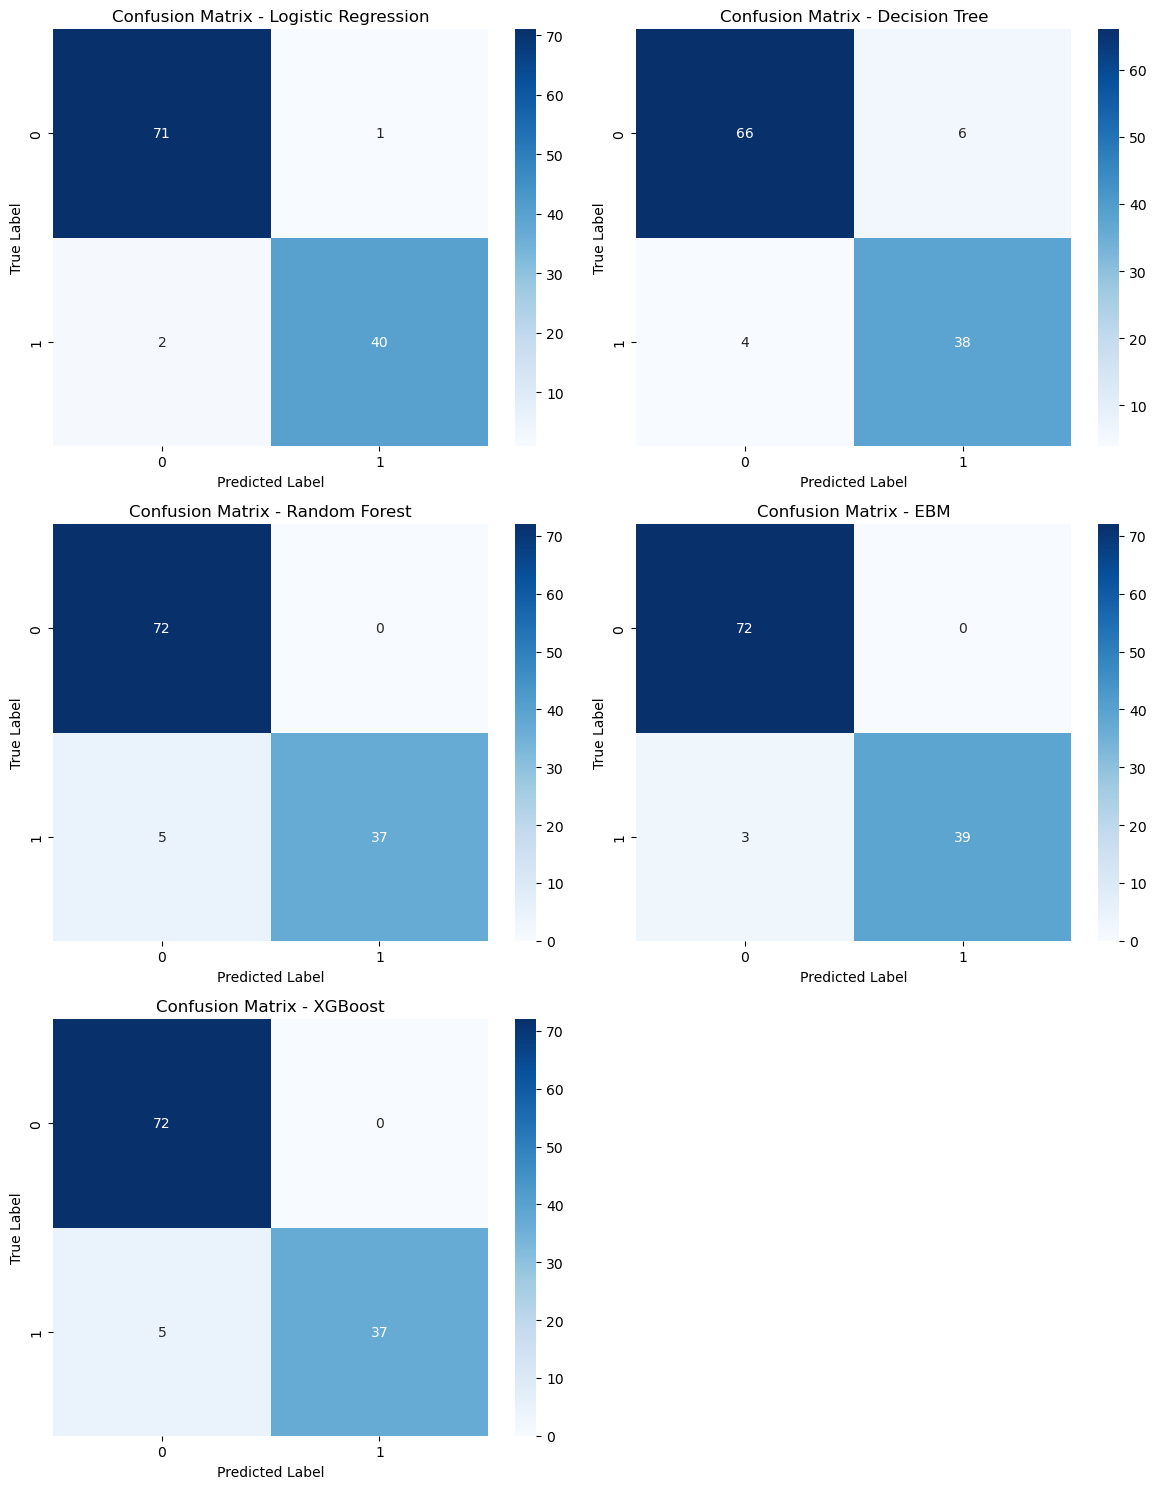

In [9]:
print("🔵 Confusion Matrices (Full Features)")
plot_all_confusion_matrices(models_full, X_test_full, y_test_full)

🔵 ROC Curves (Full Features)


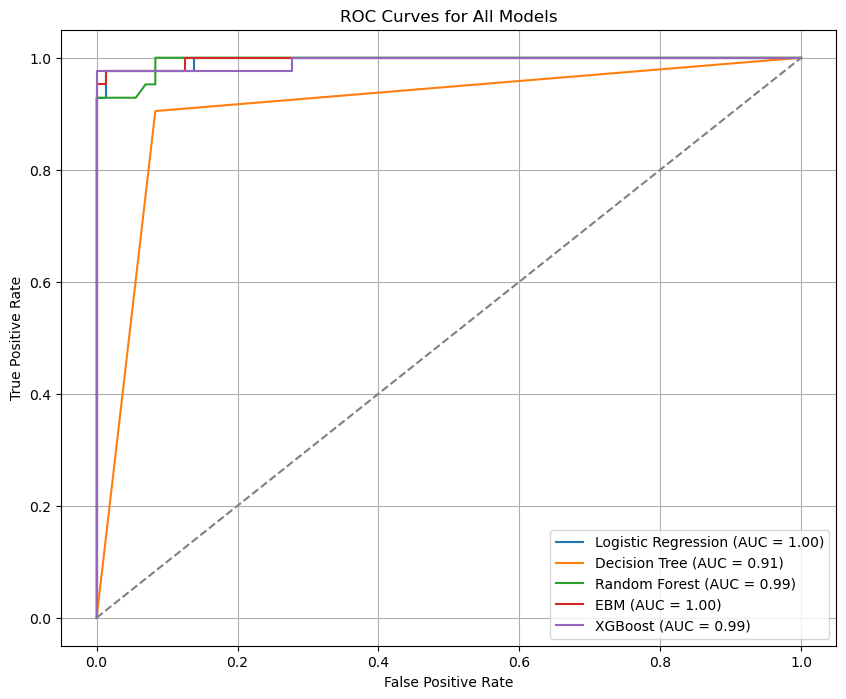

In [10]:
print("🔵 ROC Curves (Full Features)")
plot_all_roc_curves(models_full, X_test_full, y_test_full)

🟢 Confusion Matrices (Selected Features)


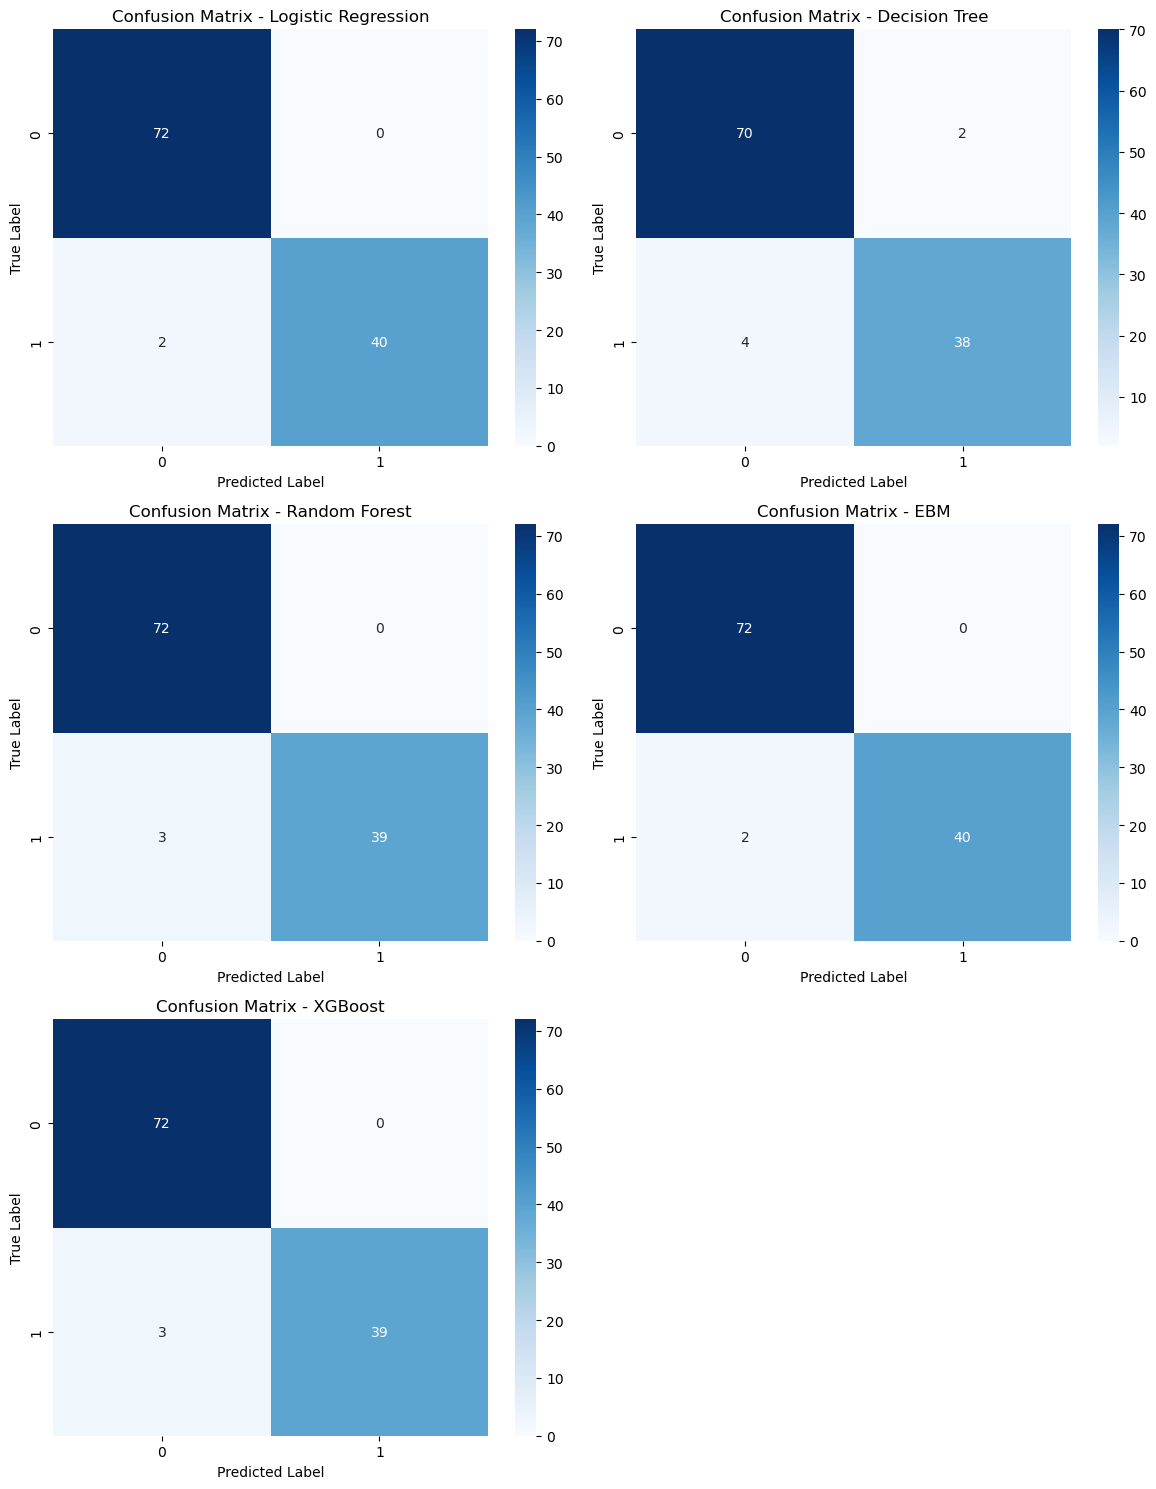

In [12]:
print("🟢 Confusion Matrices (Selected Features)")
plot_all_confusion_matrices(models_selected, X_test_sel, y_test_sel)

🟢 ROC Curves (Selected Features)


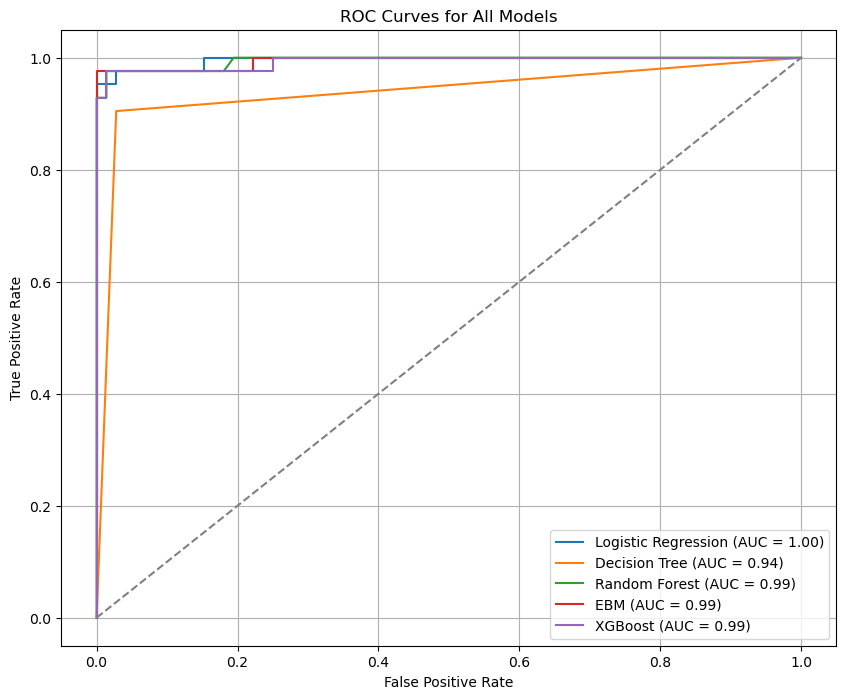

In [14]:

print("🟢 ROC Curves (Selected Features)")
plot_all_roc_curves(models_selected, X_test_sel, y_test_sel)